In [3]:
import math, os
import numpy as np
import pickle
import pickle
from scipy import constants
from numba import jit
from astropy.io import fits
from POSEIDON.core import create_star, create_planet, define_model, make_atmosphere, read_opacities, wl_grid_constant_R, wl_grid_line_by_line, compute_spectrum
from POSEIDON.constants import R_Sun
from POSEIDON.visuals import plot_stellar_flux
from POSEIDON.constants import R_J, M_J
import numpy as np
from spectres import spectres
from tqdm import tqdm
from time import time
from matplotlib.pyplot import *
import time
import pickle
from scipy import constants
import numpy as np
from matplotlib.pyplot import cm
from array import *
from scipy import special
from scipy import interp
from scipy import ndimage
from astropy.io import fits
import glob
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
import matplotlib.pyplot as plt

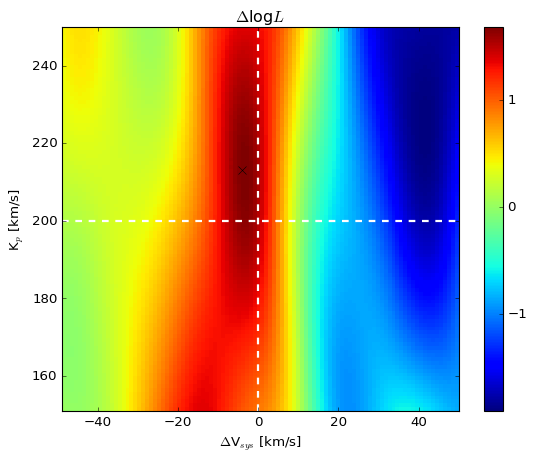

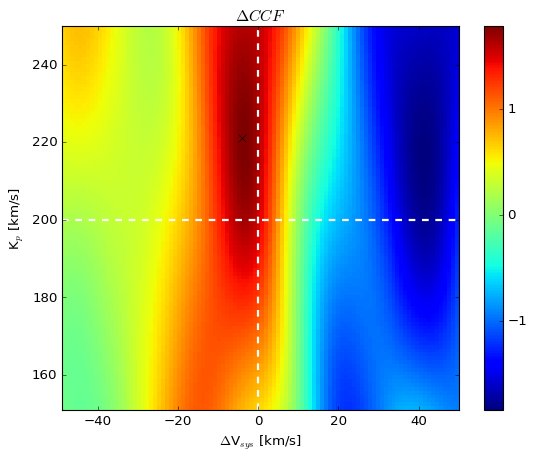

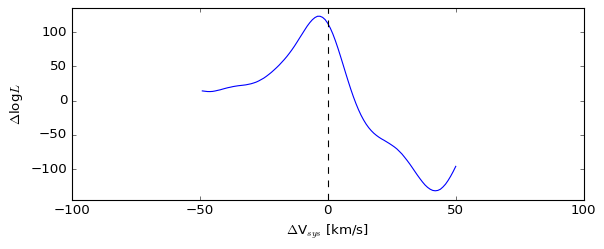

In [24]:
output_path = './CC_output/WASP-121b/'
name = 'BEST_FIT'
filearr = sorted(glob.glob(output_path+'test_sysrem_*.pic'))

Vsys = []
for i in range(len(filearr)):
	Vsysarr, Kparr, logLarr, CCF_arr = pickle.load(open(filearr[i],'rb'), encoding='latin1')
	Vsys = np.append(Vsys, Vsysarr)

logL = np.zeros((len(logLarr), len(Vsys)))
CCF = np.zeros((len(logLarr), len(Vsys)))

curr = 0
for i in range(len(filearr)):
	Vsysarr, Kparr, logLarr, CCF_arr = pickle.load(open(filearr[i],'rb'), encoding='latin1')
	logL[:, curr:curr+logLarr.shape[1]] = logLarr
	CCF[:, curr:curr+logLarr.shape[1]] = CCF_arr
	curr += logLarr.shape[1]

# xlimm=90
# ylimm=120
Vsysarr = Vsys
Kp = 200  #orbital velocity of planet

#logL
CCFarr1 = logL[::-1, :]
CCFarr1 = CCFarr1-np.mean(CCFarr1)
# stdev=np.std(CCFarr1[ylimm:-1,0:xlimm])
stdev=np.std(CCFarr1)
maxx = (CCFarr1/stdev).max()
loc = np.where(CCFarr1/stdev == maxx)
Vsysarr = Vsys
fig, ax = subplots()
cax = ax.imshow((CCFarr1)/stdev, extent = [Vsysarr.min(), Vsysarr.max(), Kparr.min(), Kparr.max()], aspect="auto", interpolation='none')
cbar = colorbar(cax,ticks=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axvline(x=0., color='white', ls='--', lw=2)
axhline(y=Kp, color='white', ls='--', lw=2)
plot(Vsysarr[loc[1]], Kparr[::-1][loc[0]], 'xk', ms=7)
axis([Vsysarr.min(), Vsysarr.max(), Kparr.min(), Kparr.max()])
xlabel('$\Delta$V$_{sys}$ [km/s]')
ylabel('K$_{p}$ [km/s]')
title('$\Delta $log$L$')


from datetime import datetime
now = datetime.now() # current date and time
date_time = now.strftime("%m_%d_%H_%M")

savefig(output_path+name+'_Kp_v_Vsys_LogL_SNR'+str(date_time)+'.pdf', fmt='pdf')
show()
close()


#CCF
CCFarr1 = CCF[::-1, :]
CCFarr1 = CCFarr1-np.mean(CCFarr1)
# stdev=np.std(CCFarr1[ylimm:-1,0:xlimm])
stdev=np.std(CCFarr1)
maxx = (CCFarr1/stdev).max()
loc = np.where(CCFarr1/stdev == maxx)
Vsysarr = Vsys
fig, ax = subplots()
cax = ax.imshow((CCFarr1)/stdev, extent = [Vsysarr.min(), Vsysarr.max(), Kparr.min(), Kparr.max()], aspect="auto", interpolation='none')
cbar = colorbar(cax,ticks=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axvline(x=0., color='white', ls='--', lw=2)
axhline(y=Kp, color='white', ls='--', lw=2)
plot(Vsysarr[loc[1]], Kparr[::-1][loc[0]], 'xk', ms=7)
axis([Vsysarr.min(), Vsysarr.max(), Kparr.min(), Kparr.max()])
xlabel('$\Delta$V$_{sys}$ [km/s]')
ylabel('K$_{p}$ [km/s]')
title('$\Delta CCF$')
savefig(output_path+name+'_Kp_v_Vsys_LogL_SNR'+str(date_time)+'.pdf', fmt='pdf')
show()
close()



# slice at Kp
slicee = CCFarr1[len(CCFarr1)//2]
plot(Vsysarr, slicee)
axis([-100, 100, 1.1*slicee.min(), 1.1*slicee.max()])
xlabel('$\Delta$V$_{sys}$ [km/s]')
ylabel('$\Delta$log$L$')
axvline(x = 0, ls='--', color='black')
subplots_adjust(left=0.1, right=0.9, top=0.7, bottom=0.3)
savefig(output_path+name+'_TOTAL_logL_SLICE.pdf', fmt='pdf')
show()
close()

In [8]:
import dill
data_dir = './reference_data/observations/WASP-121b'
pl_dat = dill.load(open('{}/planet_info_py3.dill'.format(data_dir),'rb'))
p_vel1 = pl_dat['p_vel1']   # planet velocity for transit 1 (transit 2 exists but is low quality)
tmodel1 = pl_dat['tmodel1'] # transit model, used for weighting
bv1 = pl_dat['bv1']         # barycentric correction
ph1 = pl_dat['ph1']         # orbital phase
bv1=bv1/1000
ph1=ph1
pickle.dump(bv1, open(data_dir+'/rvel.pic','wb'))  #the Vbary+Vsys now saved as one happy array pickle
pickle.dump(ph1, open(data_dir+'/ph.pic','wb'))  #the Vbary+Vsys now saved as one happy array pickle

In [10]:
a = CCFarr1-np.mean(CCFarr1)

In [11]:
a.shape

(100, 100)

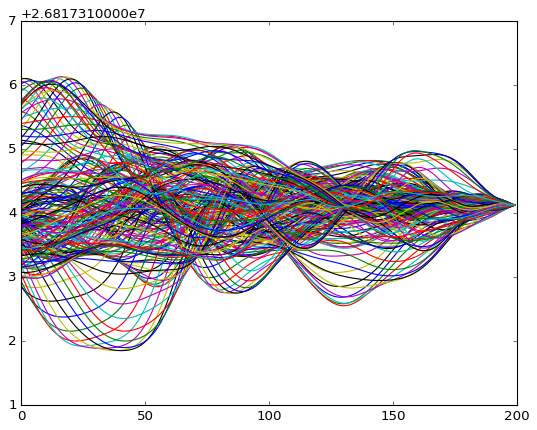

In [8]:
plt.plot(logL)

In [9]:
logL.std()

0.5355040066316852